# Ejercicio 1 - GAN MNIST Dataset

Para el siguiente ejemplo, utilizaremos el dataset de fashion MNIST que contiene imagenes de 28x28 pixeles de diferentes artículos.

Implementaremos un Generador y un Discriminador y observaremos los resultados luego de ejectuar 100 epochs (puedes variar la cantidad de ciclos para obtener mejores resultados)

Se recomienda ejecutar el notebook completo en **COLAB**

>Note: Debes importar el archivo `fashion-mnist_train.csv` dentro del directorio `sample_data`

In [144]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [145]:
import matplotlib.pyplot as plt
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

In [146]:
!gdown --fuzzy https://drive.google.com/file/d/1WX4NfGfx5Bs13qW2yTBbFPCABn6VdXdH/view

Downloading...
From: https://drive.google.com/uc?id=1WX4NfGfx5Bs13qW2yTBbFPCABn6VdXdH
To: /content/fashion-mnist_train.csv
100% 133M/133M [00:00<00:00, 246MB/s]


In [147]:
train_data = pd.read_csv('/content/fashion-mnist_train.csv') #TODO
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
X_train = train_data.copy().drop(columns='label') #TODO
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
X_train=X_train.values
print(X_train.shape)

(60000, 784)


In [150]:
# Reshape
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') #TODO realizar un reshape, recordar la opción -1 y las dimensiones de entrada 28,28,1
X_train = (X_train - 127.5) / 127.5  # Normalize the images to [-1, 1]
print(X_train.shape)

(60000, 28, 28, 1)


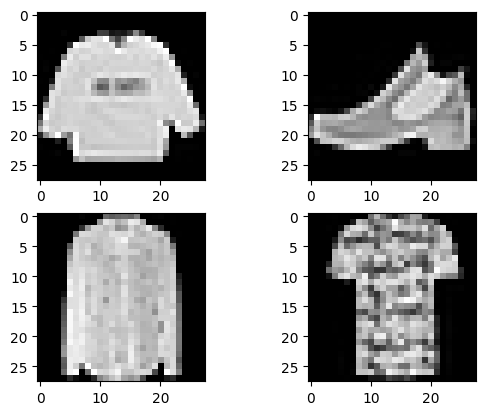

In [151]:
# Visualizamos
fig,axe=plt.subplots(2,2)
idx = 0
for i in range(2):
    for j in range(2):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=1

In [152]:
X_train =  X_train.astype('float32')  #esto ya está hecho arriba, pero igual lo dejamos

Los datos de píxeles varían de 0 a 255, por lo que se divide cada píxel entre 255, es decir, se normalizan los datos de modo que el rango esté entre 0 y 1.

In [153]:
#X_train = #TODO
#X_train = X_train*2 - 1.

In [154]:
# Generador
generator = Sequential()
generator.add(Dense(512,input_shape=[100]))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(128))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))
generator.add(Dense(784))
generator.add(Reshape([28,28,1])) #TODO completar con la capa de salida (hint: es el tamaño de la imagen por un canal)

In [155]:
generator.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_71 (Dense)            (None, 512)               51712     
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 512)               0         
                                                                 
 batch_normalization_27 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dense_72 (Dense)            (None, 256)               131328    
                                                                 
 leaky_re_lu_49 (LeakyReLU)  (None, 256)               0         
                                                                 
 batch_normalization_28 (Ba  (None, 256)               1024      
 tchNormalization)                                   

In [156]:
# Discriminador
discriminator = Sequential()
discriminator.add(Dense(1,input_shape=[28,28,1]))
discriminator.add(Flatten())
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(128))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(64))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [157]:
discriminator.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 28, 28, 1)         2         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 256)               200960    
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 256)               0         
                                                                 
 dropout_21 (Dropout)        (None, 256)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               32896     
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 128)             

In [158]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss=cross_entropy) #TODO
discriminator.trainable = False

In [159]:
GAN.compile(optimizer='adam',loss=cross_entropy) #TODO

In [164]:
epochs = 150  #PROBAR CAMBIAR ESTE NRO
batch_size = 2048
noise_shape=100

Currently on Epoch 1
1/1 [==============================] - 0s 26ms/step


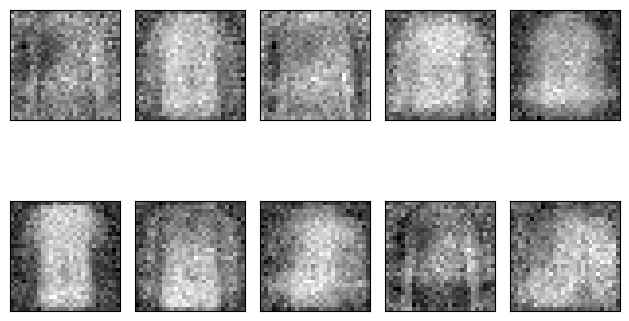

In [ ]:
with tf.device('/gpu:0'):
 for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")


    for i in range(X_train.shape[0]//batch_size):

        if (i+1)%50 == 0:
            print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")

        noise=np.random.normal(size=[batch_size,noise_shape])

        gen_image = generator.predict_on_batch(noise)

        train_dataset = X_train[i*batch_size:(i+1)*batch_size]

        #training discriminator on real images
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = True
        d_loss_real=discriminator.train_on_batch(train_dataset,train_label)

        #training discriminator on fake images
        train_label=np.zeros(shape=(batch_size,1))
        d_loss_fake=discriminator.train_on_batch(gen_image,train_label)


        #training generator
        noise=np.random.normal(size=[batch_size,noise_shape])
        train_label=np.ones(shape=(batch_size,1))
        discriminator.trainable = False

        d_g_loss_batch =GAN.train_on_batch(noise, train_label)




    #plotting generated images at the start and then after every 10 epoch
    if epoch % 10 == 0:
        samples = 10
        x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))

        for k in range(samples):
            plt.subplot(2, 5, k+1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()



print('Training is complete')

In [ ]:
#NO SON NECESARIOS LOS CHECKPOINTS

In [ ]:
noise=np.random.normal(size=[10,noise_shape])
gen_image = generator.predict(noise)

In [ ]:
plt.imshow(noise)
plt.title('How the noise looks')

In [ ]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using GANs')
idx=0
for i in range(2):
    for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=10